In [3]:
import csv
with open ('iris.data.txt') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines:
        print(', '.join(row))

5.1, 3.5, 1.4, 0.2, Iris-setosa
4.9, 3.0, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.3, 0.2, Iris-setosa
4.6, 3.1, 1.5, 0.2, Iris-setosa
5.0, 3.6, 1.4, 0.2, Iris-setosa
5.4, 3.9, 1.7, 0.4, Iris-setosa
4.6, 3.4, 1.4, 0.3, Iris-setosa
5.0, 3.4, 1.5, 0.2, Iris-setosa
4.4, 2.9, 1.4, 0.2, Iris-setosa
4.9, 3.1, 1.5, 0.1, Iris-setosa
5.4, 3.7, 1.5, 0.2, Iris-setosa
4.8, 3.4, 1.6, 0.2, Iris-setosa
4.8, 3.0, 1.4, 0.1, Iris-setosa
4.3, 3.0, 1.1, 0.1, Iris-setosa
5.8, 4.0, 1.2, 0.2, Iris-setosa
5.7, 4.4, 1.5, 0.4, Iris-setosa
5.4, 3.9, 1.3, 0.4, Iris-setosa
5.1, 3.5, 1.4, 0.3, Iris-setosa
5.7, 3.8, 1.7, 0.3, Iris-setosa
5.1, 3.8, 1.5, 0.3, Iris-setosa
5.4, 3.4, 1.7, 0.2, Iris-setosa
5.1, 3.7, 1.5, 0.4, Iris-setosa
4.6, 3.6, 1.0, 0.2, Iris-setosa
5.1, 3.3, 1.7, 0.5, Iris-setosa
4.8, 3.4, 1.9, 0.2, Iris-setosa
5.0, 3.0, 1.6, 0.2, Iris-setosa
5.0, 3.4, 1.6, 0.4, Iris-setosa
5.2, 3.5, 1.5, 0.2, Iris-setosa
5.2, 3.4, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.6, 0.2, Iris-setosa
4.8, 3.1, 1.6, 0.2, Iris-setosa
5.4, 3.4

In [10]:
import csv 
import random
def loadDataset(filename, split, trainingSet=[], testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y]=float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

In [11]:
trainingSet=[]
testSet=[]
loadDataset(r'iris.data.txt', 0.66, trainingSet, testSet)
print('Train: '+repr(len(trainingSet)))
print('Test: '+repr(len(testSet)))

Train: 106
Test: 44


In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [15]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [16]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))

In [17]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.947
k: 3, Train/Test Score: 0.955/0.974
k: 5, Train/Test Score: 0.973/0.974
k: 7, Train/Test Score: 0.973/0.947
k: 9, Train/Test Score: 0.973/0.974
k: 11, Train/Test Score: 0.973/0.974
k: 13, Train/Test Score: 0.982/0.947
k: 15, Train/Test Score: 0.982/0.947
k: 17, Train/Test Score: 0.982/0.947
k: 19, Train/Test Score: 0.982/0.947


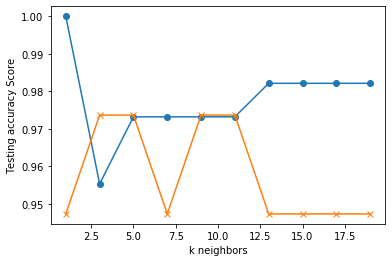

In [30]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
        
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


In [19]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.974


In [20]:
new_iris_data = [[4.3, 3.2, 1.3, 0.2]]
predicted_class = knn.predict(new_iris_data)
print(predicted_class)

[0]


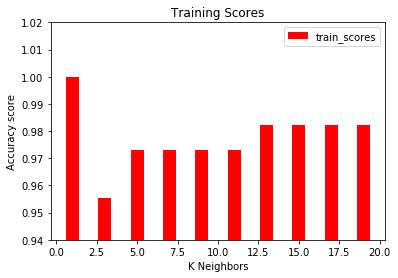

In [67]:
x1 = [1,3,5,7,9,11,13,15,17,19]

y1 = train_scores 
y2 = test_scores

plt.bar(x, y1, label= 'train_scores', color = 'r')
plt.title('Training Scores')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy score')
plt.ylim(.94, 1.02)
plt.legend()
plt.show()

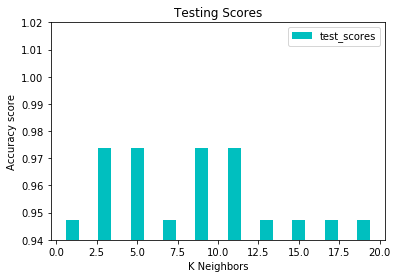

In [68]:
plt.bar(x, y2, label= 'test_scores', color = 'c')
plt.title('Testing Scores')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy score')
plt.ylim(.94, 1.02)
plt.legend()
plt.show()

In [79]:
# x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.4,random_state=0)
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from pprint import pprint

x = [1,3,5,7,9,11,13,15,17,19]
y = train_scores
cross_scores = []
for i in range(2, 0,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=clf, X=x, y=y, cv=5, n_jobs=4)
    cross_scores.append((i,scores.mean()))
print(cross_scores)

[]


In [84]:
features = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

x = df[features[:-1]]
y = df['class']

# x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.4,random_state=0)
depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=x, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

KeyError: "None of [Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',\n       'fM3Trans', 'fAlpha', 'fDist'],\n      dtype='object')] are in the [columns]"